In [ ]:

!pip install retentioneering

In [11]:
import pandas as pd
import retentioneering


data = pd.read_csv('event_data.csv')

retentioneering.config.update({
    'user_col': 'user_id',
    'event_col':'event',
    'event_time_col':'timestamp',
})

In [12]:
vec = data.rete.extract_features(feature_type='count',
                                 ngram_range=(1, 1))

vec

,cancel_count,connect_count,execute_count,l1_count,l2_count,liq_count,liq1_count,order_count,plazo_count,sl_count,type_count,type_exec_count,type_exec1_count
user_id,,,,,,,,,,,,,
122915,1,7,0,4,2,0,0,1,0,18,0,0,0
463458,1,1,0,0,1,0,0,0,0,8,0,0,0
1475907,1,2,0,1,2,1,0,1,0,5,1,1,0
1576626,1,1,0,0,0,0,0,0,0,0,0,0,0
2112338,1,2,0,0,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999275109,1,0,0,0,0,0,0,1,0,2,1,0,1
999642905,0,1,1,0,0,1,0,1,0,2,1,1,0
999914554,1,5,0,1,0,0,0,1,0,10,0,0,0


## Clusters

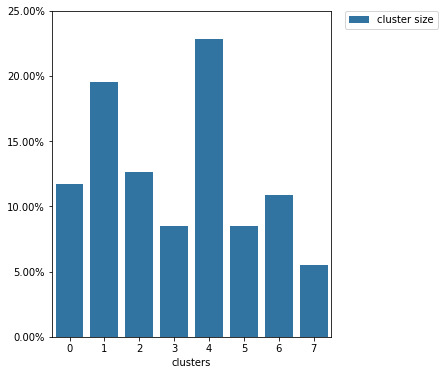

In [3]:
data.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=8,
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

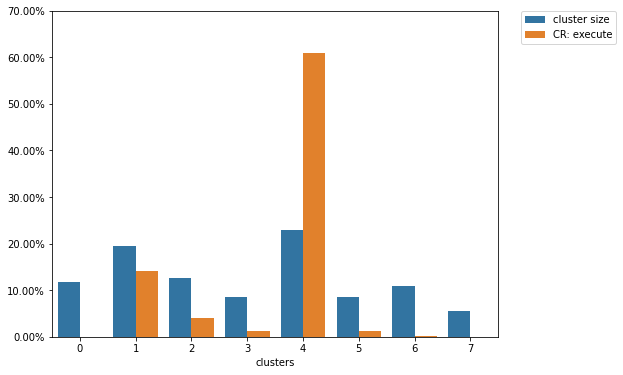

In [4]:
data.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=8,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['execute']);

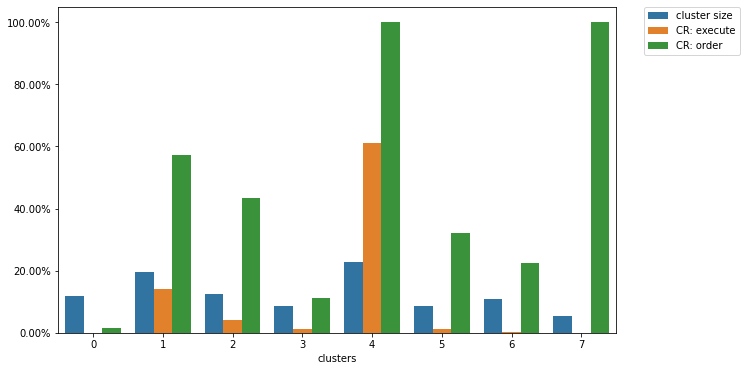

In [16]:
data.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=8,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['execute','order']);

## Exploring individual clusters

In [17]:
clus_0 = data.rete.filter_cluster(1)

In [ ]:
clus_0.rete.plot_graph(thresh=0.1,
                       weight_col='user_id',
                       targets = {'cancel':'red',
                                  'execute':'green'})



In [10]:
from IPython.display import HTML

HTML(filename="experiments\graph_2023-05-03 10_49_41_290641.html")


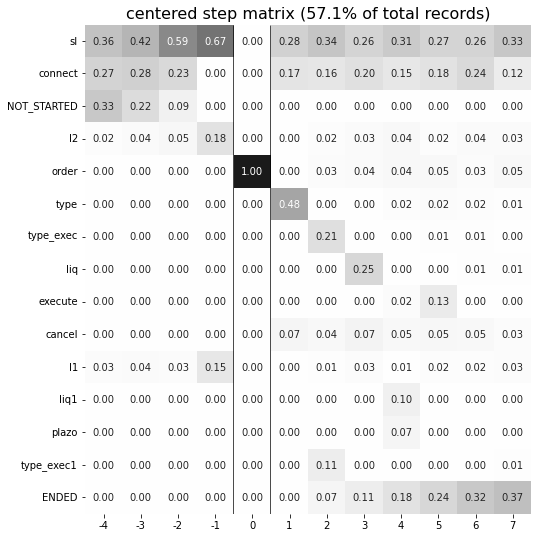

In [18]:
clus_0.rete.step_matrix(max_steps=12,
                        centered={'event': 'order',
                                  'left_gap': 4,
                                  'occurrence': 1});

In [19]:
clus_0_7 = data.rete.filter_cluster([0,7])

## Compare clusters

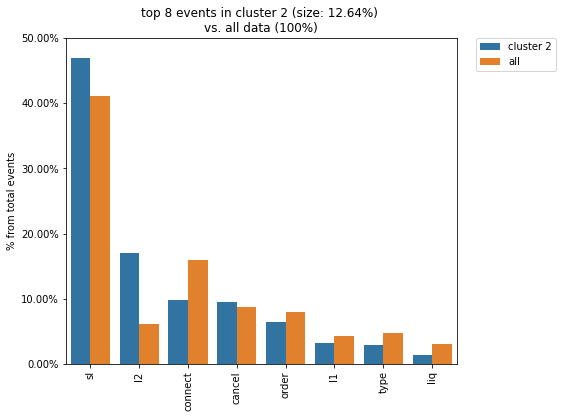

In [20]:
data.rete.cluster_event_dist(2)

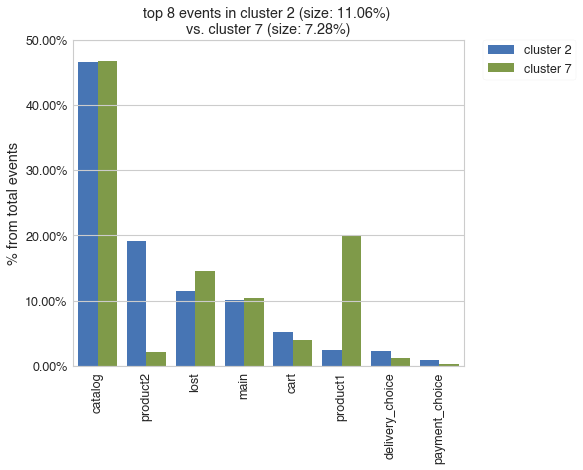

In [16]:
data.rete.cluster_event_dist(2, 7)

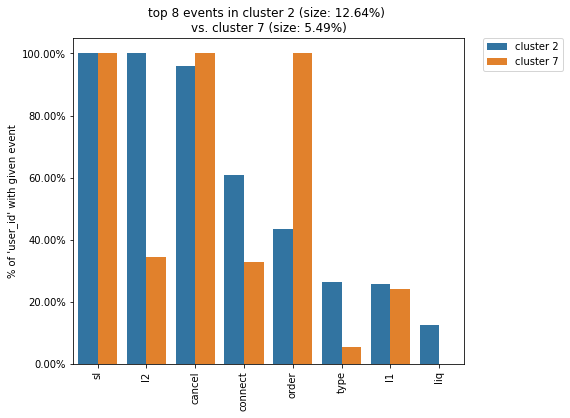

In [21]:
data.rete.cluster_event_dist(2, 7,
                            weight_col='user_id')

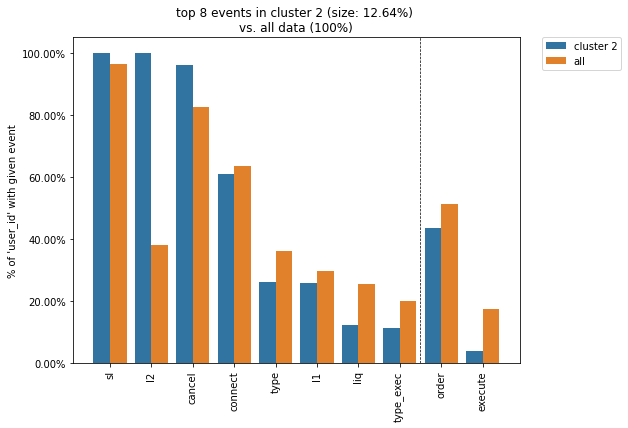

In [22]:
data.rete.cluster_event_dist(2,
                            weight_col='user_id',
                            targets=['order','execute'])

## Visualize cluster using project()

C:\Users\jljuncos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jljuncos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


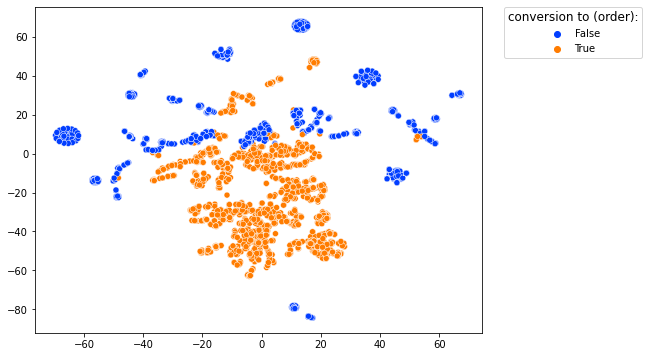

In [23]:
data.rete.project(plot_type ='targets',
                  targets = ['order'],
                  method='tsne');

C:\Users\jljuncos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jljuncos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


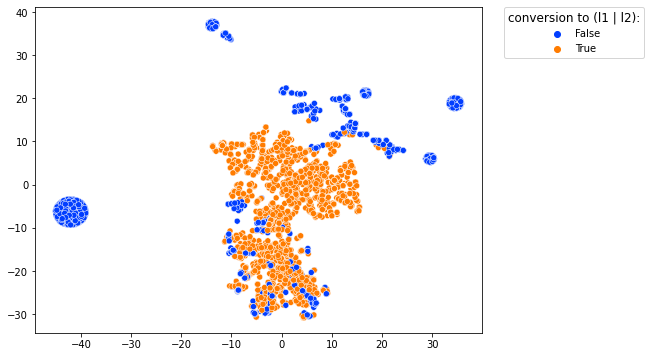

In [24]:
data.rete.project(plot_type ='targets',
                  targets = ['l1', 'l2'],
                  method='tsne',
                  perplexity = 128);

C:\Users\jljuncos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jljuncos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


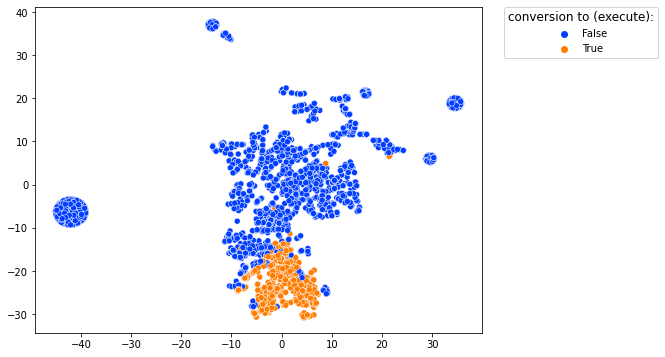

In [25]:
data.rete.project(plot_type ='targets',
                  targets = ['execute'],
                  method='tsne',
                  perplexity = 128);

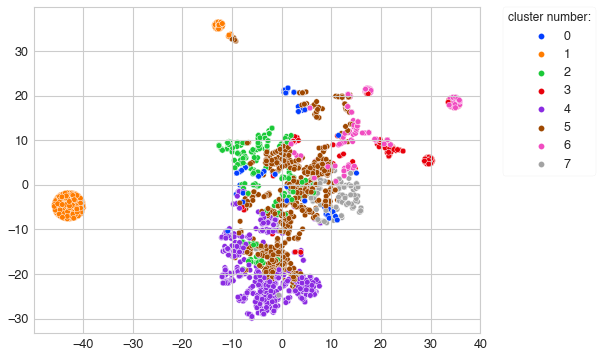

In [30]:
data.rete.project(plot_type ='clusters',
                  method='tsne',
                  perplexity=128);